## Dynamic analysis

In [ ]:
from helper import Folders
import pandas as pd
import numpy as np
import neurokit2 as nk


raw_data_folder_path = "./raw_data/"
preprocessed_data_folder_path = "./preprocessed_data/"
save_data_folder_path = "./save_data/"
images_folder_path = "./images/"
statistics_folder_path = "statistics/"
mhw_objects_folder_path = "mhw_objects/"

folders = Folders(
    end_folder = "",
    raw_data = raw_data_folder_path,
    preprocessed_data = preprocessed_data_folder_path,
    save_data = save_data_folder_path,
    images = images_folder_path,
    statistics=statistics_folder_path,
    mhw_objects=mhw_objects_folder_path
)


filenames014 = [
    "ACP_INP0014_REST1_1pnt_1vis",
    "ACP_INP0014_REST2_1pnt_1vis",
    "ACP_INP0014_REST3_1pnt_1vis",
    "ACP_INP0014_REST1_1pnt_2vis",
    "ACP_INP0014_REST2_1pnt_2vis",
    "ACP_INP0014_REST3_1pnt_2vis"
]
path014 = "rest_14/"

filenames019 = [
    "INP0019_v1.4_REST1_R003_R003_08.11.23",
    "INP0019_v1.4_REST2_R003_R003_08.11.23",
    "INP0019_v1.4_REST3_R003_R003_08.11.23",
    "INP0019_v1.5_REST2_Op005_Op007_08.12.23",
    "INP0019_v1.5_REST3_Op005_Op007_08.12.23",
]
path019 = "rest_19/"

filenames036 = [
    "INP0036_v1.4_REST1_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST2_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST3_Op008_Op011_11.12.23",
    "INP0036_v1.5_REST1_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST2_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST3_Op005_Op010_12.12.23",
]
path036 = "rest_36/"

filenames045 = [
    "INP0045_v1.4_REST1_R003_R003_08.11.23",
    "INP0045_v1.4_REST2_R003_R003_08.11.23",
    "INP0045_v1.4_REST3_R003_R003_08.11.23",
    "INP0045_v1.5_rs11_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs22_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs23_Op005_Op008_Op011_17.11.23",
]
path045 = "rest_45/"

filenames064 = [
    "INP0064_v1.4_rs11_S008_R003_04.12.23",
    "INP0064_v1.4_rs12_Op008_R003_04.12.23",
    "INP0064_v1.4_rs13_Op008_R003_04.12.23",
    "INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23",
    "INP0064_v1.5_rs22_Op009_A002_13.12.23",
    "INP0064_v1.5_rs23_Op009_A002_13.12.23",
]
path064 = "rest_64/"

In [5]:
mean_vals = pd.DataFrame()
current_dataset = "14"

for filen in filenames014:
    # filename = 'save_data/ms_event_splited_statistics/dynamic/mean/'+filen+'_th_mean.csv'
    # filename = 'save_data/ms_event_splited_statistics/dynamic/'+filen+'_th.csv'
    filename = f'{folders.save_data}{folders.statistics}{path014}{filen}_th_split_dynamic_stats.csv'
    print("Reading file", filename)
    df = pd.read_csv(filename)
    if 'Unnamed: 0' in df:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    df["File"] = filen
    mean_vals = pd.concat([mean_vals, df])

Reading file ./save_data/statistics/rest_14/ACP_INP0014_REST1_1pnt_1vis_th_split_dynamic_stats.csv
Reading file ./save_data/statistics/rest_14/ACP_INP0014_REST2_1pnt_1vis_th_split_dynamic_stats.csv
Reading file ./save_data/statistics/rest_14/ACP_INP0014_REST3_1pnt_1vis_th_split_dynamic_stats.csv
Reading file ./save_data/statistics/rest_14/ACP_INP0014_REST1_1pnt_2vis_th_split_dynamic_stats.csv
Reading file ./save_data/statistics/rest_14/ACP_INP0014_REST2_1pnt_2vis_th_split_dynamic_stats.csv
Reading file ./save_data/statistics/rest_14/ACP_INP0014_REST3_1pnt_2vis_th_split_dynamic_stats.csv


In [6]:
mean_vals

,Microstate_0_to_1,Microstate_0_to_2,Microstate_0_to_3,Microstate_1_to_0,Microstate_1_to_2,Microstate_1_to_3,Microstate_2_to_0,Microstate_2_to_1,Microstate_2_to_3,Microstate_3_to_0,Microstate_3_to_1,Microstate_3_to_2,Event,Order,File
0,0.002941,0.002740,0.003275,0.003626,0.002702,0.003128,0.002901,0.002611,0.003772,0.002306,0.002842,0.002628,Closed,0,ACP_INP0014_REST1_1pnt_1vis
1,0.003497,0.002783,0.002997,0.002691,0.002626,0.003151,0.002922,0.002296,0.003270,0.002634,0.002634,0.002354,Opened,1,ACP_INP0014_REST1_1pnt_1vis
2,0.002281,0.002281,0.003612,0.002714,0.002714,0.004072,0.002630,0.002221,0.001987,0.002459,0.003101,0.002352,Closed,2,ACP_INP0014_REST1_1pnt_1vis
3,0.001930,0.003475,0.004092,0.002315,0.003367,0.002245,0.002608,0.002490,0.002905,0.002703,0.002646,0.002358,Opened,3,ACP_INP0014_REST1_1pnt_1vis
4,0.003218,0.002670,0.003150,0.002468,0.002870,0.002411,0.002401,0.003156,0.003087,0.003701,0.002826,0.002422,Closed,4,ACP_INP0014_REST1_1pnt_1vis
5,0.002620,0.002758,0.003378,0.002522,0.002328,0.003104,0.002645,0.002711,0.002380,0.002870,0.002687,0.002565,Opened,5,ACP_INP0014_REST1_1pnt_1vis
6,0.002962,0.002962,0.003169,0.002980,0.001965,0.003423,0.002082,0.002545,0.002372,0.002719,0.002497,0.002553,Closed,6,ACP_INP0014_REST1_1pnt_1vis
7,0.002762,0.002275,0.004630,0.002128,0.002800,0.002632,0.002502,0.003424,0.002041,0.002669,0.003041,0.002731,Opened,7,ACP_INP0014_REST1_1pnt_1vis
8,0.003573,0.002813,0.003497,0.002806,0.002744,0.003243,0.002611,0.002307,0.002854,0.002106,0.002809,0.002357,Closed,8,ACP_INP0014_REST1_1pnt_1vis
9,0.003384,0.002901,0.003465,0.002480,0.002949,0.003083,0.002192,0.002862,0.002253,0.002767,0.002146,0.002202,Opened,9,ACP_INP0014_REST1_1pnt_1vis


In [7]:
def mean_by_event(df):
    clone = df.copy()
    return clone.groupby('Event').mean()

In [8]:
def mean_by_transition_raw_stats(df):
    clone = df.copy()
    # clone.drop('Event', axis=1, inplace=True)
    clone.reset_index(drop=True, inplace=True)
    clone.set_index(['File', 'Event', 'Order'], inplace=True)
    return clone.T.mean().to_frame()

In [9]:
def mean_by_transition(df):
    clone = df.copy()
    # clone.drop('Event', axis=1, inplace=True)
    clone.reset_index(drop=True, inplace=True)
    clone.set_index(['File', 'Event'], inplace=True)
    return clone.T.mean().to_frame()


In [10]:
mbt = mean_by_transition_raw_stats(mean_vals)

In [11]:
mbt

0
File                        Event  Order          
ACP_INP0014_REST1_1pnt_1vis Closed 0      0.002956
                            Opened 1      0.002821
                            Closed 2      0.002702
                            Opened 3      0.002761
                            Closed 4      0.002865
                            Opened 5      0.002714
                            Closed 6      0.002686
                            Opened 7      0.002803
                            Closed 8      0.002810
                            Opened 9      0.002724
ACP_INP0014_REST2_1pnt_1vis Closed 0      0.002860
                            Opened 1      0.002665
                            Closed 2      0.002948
                            Opened 3      0.002793
                            Closed 4      0.002790
                            Opened 5      0.002649
                            Closed 6      0.002689
                            Opened 7      0.002623
                            Closed 8      0.002766
                            Opened 9      0.002723
ACP_INP0014_REST3_1pnt_1vis Closed 0      0.002763
                            Opened 1      0.002776
                            Closed 2      0.002950
                            Opened 3      0.002647
                            Closed 4      0.002943
                            Opened 5      0.002705
                            Closed 6      0.002771
                            Opened 7      0.002754
                            Closed 8      0.002987
                            Opened 9      0.002507
ACP_INP0014_REST1_1pnt_2vis Closed 0      0.003042
                            Opened 1      0.002626
                            Closed 2      0.002813
                            Opened 3      0.002756
                            Closed 4      0.002901
                            Opened 5      0.002498
                            Closed 6      0.002792
                            Opened 7      0.002725
                            Closed 8      0.002913
                            Opened 9      0.002694
ACP_INP0014_REST2_1pnt_2vis Closed 0      0.002853
                            Opened 1      0.002720
                            Closed 2      0.002772
                            Opened 3      0.002760
                            Closed 4      0.002729
                            Opened 5      0.002555
                            Closed 6      0.002798
                            Opened 7      0.002745
                            Closed 8      0.002921
                            Opened 9      0.002679
ACP_INP0014_REST3_1pnt_2vis Closed 0      0.002850
                            Opened 1      0.002780
                            Closed 2      0.002868
                            Opened 3      0.002632
                            Closed 4      0.002938
                            Opened 5      0.002758
                            Closed 6      0.002927
                            Opened 7      0.002687
                            Closed 8      0.002860
                            Opened 9      0.002670

In [12]:
mbtr = mbt.reset_index()
opened = mbtr[mbtr['Event'] == 'Opened'].copy()
closed = mbtr[mbtr['Event'] == 'Closed']
opened['Opened'] = opened[0]
opened.drop(0, axis=1, inplace=True)
# opened['Closed'] = closed
opened.drop('Event', axis=1, inplace=True)
opened.drop('File', axis=1, inplace=True)
opened.drop('Order', axis=1, inplace=True)
merged = opened.reset_index()
merged.drop('index', axis=1, inplace=True)

# for i in range(abs(len(merged['Opened'].values) - len(closed[0].values))):
#     # merged = merged.sort_index()
merged['Closed'] = closed[0].values[:len(merged['Opened'].values)]
merged

,Opened,Closed
0,0.002821,0.002956
1,0.002761,0.002702
2,0.002714,0.002865
3,0.002803,0.002686
4,0.002724,0.002810
5,0.002665,0.002860
6,0.002793,0.002948
7,0.002649,0.002790
8,0.002623,0.002689
9,0.002723,0.002766


In [13]:
# mbtr.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/by_transition/'+current_dataset+'.csv')

<Axes: >

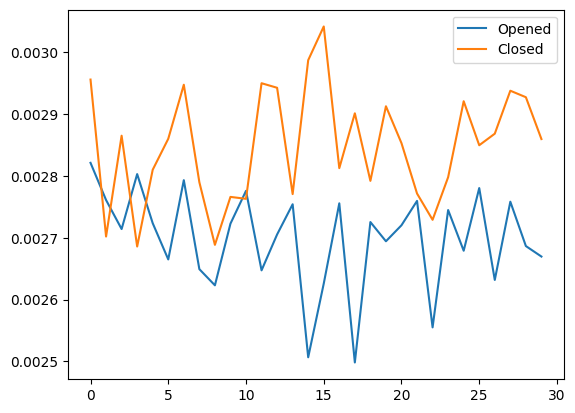

In [14]:
merged.plot()

In [15]:
# merged.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/by_transition/'+current_dataset+'_merge.csv')


In [16]:
# mean_vals

In [17]:
# mvi = mean_vals.drop(['Order', 'File'], axis=1)
# mvf = mean_vals.drop(['Order', 'Event'], axis=1)
# mvi

In [18]:
# meaned_mean = mean_by_event(mvi)

In [19]:
# meaned_file = mvf.groupby('File').mean()

In [20]:
# meaned_file.T.mean()

In [21]:
# meaned_mean

In [22]:
# meaned_mean.T.mean()

In [23]:
# meaned_mean.to_csv('./save_data/ms_event_splited_statistics/dynamic/mean/meaned_mean/'+current_dataset+'.csv')

## Logistic regression

In [24]:
# mean_vals = pd.DataFrame()
# 
# full_filelist = [filenames014, filenames019, filenames036, filenames045, filenames064]
# full_dataset = ['14', '19', '36', '45']
# 
# mode = "file"
# 
# from sklearn.preprocessing import StandardScaler
# 
# # for filelist in full_filelist:
# #     for filen in filelist:
# #         filename = 'save_data/ms_event_splited_statistics/dynamic/' + filen + '_th.csv'
# #         # print("Reading file", filename)
# #         df = pd.read_csv(filename)
# #         df["File"] = filen
# #         mean_vals = pd.concat([mean_vals, df])
# 
# X_vals = np.array([]).reshape(0, 12)
# y_vals = np.array([])
# 
# for filelist in full_filelist:
#     for filen in filelist:
#         filename = 'save_data/ms_event_splited_statistics/dynamic/' + filen + '_th.csv'
#         # print("Reading file", filename)
#         df = pd.read_csv(filename)
#         vals = df.drop(['Event', 'Order', 'Unnamed: 0'], axis=1)
#         vals = drop_self_to_self(4, vals)
#         scaler = StandardScaler()
#         scaler.fit(vals)
#         normal_vals = scaler.transform(vals)
#         on_append = np.array(normal_vals)
#         X_vals = np.append(X_vals, on_append, axis=0)
#         y_vals = np.append(y_vals, np.array(df['Event']), axis=0)
# 
# 
# 
# 
# # for dataset_name in full_dataset:
# #     filename = 'save_data/ms_event_splited_statistics/dynamic/mean/by_transition/' + dataset_name + '.csv'
# #     df = pd.read_csv(filename)
# #     df["File"] = filen
# #     mean_vals = pd.concat([mean_vals, df])
# 
# # if 'Unnamed: 0' in mean_vals:
# #     mean_vals.drop('Unnamed: 0', axis=1, inplace=True)
# # if mode == "file":
# #     mean_vals = drop_self_to_self(4, mean_vals)
# # data = X_vals
# # data.drop(['Order', 'File'], axis=1, inplace=True)
# 
# # X_vals = np.ndarray(X_vals).shape
# # y_vals = np.array(y_vals).shape
# # X_vals = np.array(X_vals)
# X_vals.shape, y_vals.shape

In [25]:
# test0 = np.array([]).reshape(0, 4)
# test1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# test2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
# test0 = np.append(test0, test1, axis=0)
# test0 = np.append(test0, test2, axis=0)
# test0

In [26]:
# normalize
# mbtr
# vals = data.drop(['Event', 'File', 'Order'], axis=1)
# scaler = StandardScaler()
# scaler.fit(vals)
# normal_vals = scaler.transform(vals)

In [27]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix
# 
# # X = normal_vals
# # y = data['Event']
# X = X_vals
# y = y_vals
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # print(X_train.shape, X_test.shape, len(y_train), len(y_test))

In [28]:
# from sklearn.metrics import classification_report
# 
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print("Acc:", accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# test_pred_value_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(classification_report(y_test, y_pred))

## Windowing logreg on realtime data

### Testing on data that was not used in training

In [29]:

# all_y_real = np.array([])
# all_y_pred = np.array([])
# for i in range(5):
#     filename = filenames064[i]+'_th'
#     dynamic_th = load_or_calc_ms_dynamic_event_splited_ms(
#         filename = filename
#     )
#     y_real = dynamic_th['Event']
#     all_y_real = np.append(all_y_real, y_real, axis=0)
#     dynamic_th_dropped = drop_self_to_self(4, dynamic_th).drop(['Order', 'Event'], axis=1)
#     X = scaler.transform(dynamic_th_dropped)
#     y_pred = logreg.predict(X)
#     all_y_pred = np.append(all_y_pred, y_pred, axis=0)
#     print(f"----{filename}----\nAcc:", accuracy_score(y_real, y_pred))
# 
# print("-----------------------TOTAL-----------------------")
# print("Acc:", accuracy_score(all_y_real, all_y_pred))
# print(confusion_matrix(all_y_real, all_y_pred))
# print(classification_report(all_y_real, all_y_pred))

### Realtime

In [30]:
# import time
# filepath = path064
# filename = filenames064[5]
# raw, microstates = load_or_calc_raw_ms(filepath, filename)
# ms_thresholded = apply_basic_switch_threshold(microstates, threshold=0.02)

In [31]:
# length = ms_thresholded['Sequence'].shape[0]

In [32]:
# preds = []
# start = time.time()
# for i in range(((sampling_rate*10) + 1), length):
#     if(i % 2048 != 0):
#         continue
#     # print(f"Checking event: ", i/sampling_rate)
#     ms_copy = split_ms_sequence(ms_thresholded, start_sample=i-(sampling_rate*10), end_sample=i+1)
#     dynamic_stats = nk.microstates_dynamic(ms_copy, show=False)
#     ms_copy_dropped = drop_self_to_self(4, dynamic_stats)
#     X = scaler.transform(ms_copy_dropped)
#     y_pred = logreg.predict(X)
#     preds.append(y_pred[0])
#     # print(f"----{filename}----\nPrediction:", y_pred)
# 
# print("Time:", time.time() - start)

| Window | Recalc segment | Time |
|--------|----------------|------|
| 5s     | 200ms          | 82s  |
| 5s     | 500ms          | 33s  |
| 5s     | 1s             | 17s  |
| 10s    | 1s             | 32s  | 